In [61]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr

In [2]:
during_covid=pd.read_csv('/home/dell/Kasia_IDDS/Twit/dane/BRK_A_2017-09-29_to_2022-04-01_added_missing_dates.csv')

In [3]:
during_covid

,date,Open,High,Low,Close,Volume
0,2018-03-29,296540.0,301518.0,296540.0,299100.0,3.0
1,2018-03-30,297060.0,300913.5,294590.0,297677.5,3.5
2,2018-03-31,297580.0,300309.0,292640.0,296255.0,4.0
3,2018-04-01,298100.0,299704.5,290690.0,294832.5,4.5
4,2018-04-02,298620.0,299100.0,288740.0,293410.0,5.0
...,...,...,...,...,...,...
1460,2022-03-28,540913.0,544000.0,533345.0,539180.0,38.0
1461,2022-03-29,544389.0,544389.0,528750.0,532011.0,37.0
1462,2022-03-30,531305.0,537371.0,527650.0,536440.0,23.0
1463,2022-03-31,538660.0,540420.0,528921.0,528921.0,23.0


In [7]:
start_date = "2021-04-01"
end_date = "2022-03-31"

after_start_date = during_covid["date"] >=start_date
before_end_date = during_covid["date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = during_covid.loc[between_two_dates]
print(filtered_dates)

            date       Open           High            Low      Close  Volume
1099  2021-04-01  387979.00  390984.000000  385702.000000  390360.00   15.00
1100  2021-04-02  389159.25  392430.500000  387376.500000  391653.75   15.75
1101  2021-04-03  390339.50  393877.000000  389051.000000  392947.50   16.50
1102  2021-04-04  391519.75  395323.500000  390725.500000  394241.25   17.25
1103  2021-04-05  392700.00  396770.000000  392400.000000  395535.00   18.00
...          ...        ...            ...            ...        ...     ...
1459  2022-03-27  537638.00  542316.333333  532223.666667  539103.00   34.00
1460  2022-03-28  540913.00  544000.000000  533345.000000  539180.00   38.00
1461  2022-03-29  544389.00  544389.000000  528750.000000  532011.00   37.00
1462  2022-03-30  531305.00  537371.000000  527650.000000  536440.00   23.00
1463  2022-03-31  538660.00  540420.000000  528921.000000  528921.00   23.00

[365 rows x 6 columns]


In [12]:
during_covid.to_csv('during_covid_stock.csv', index=False)

In [13]:
df1 = pd.read_csv('/home/dell/Kasia_IDDS/Twit/dane/BH_tweets_during_war_textanalysis.csv')
df1.rename(columns ={'Short negative factual tweets':'SNFT','Short negative personal tweets':'SNPT','Short positive factual tweets':'SPFT'
                     ,'Short positive personal tweets':'SPPT','Short neutral factual tweets':'SNeFT','Short neutral personal tweets':'SNPT',
                     'Long negative factual tweets':'LNFT','Long negative personal tweets':'LNPT',
                     'Long positive factual tweets':'LPFT','Long positive personal tweets':'LPPT',
                     'Long neutral factual tweets':'LNeFT','Long neutral personal tweets':'LNePT',
                     'Total amount of tweets':'TAoYW'
                
                    }, inplace = True)

#print(df1)
df2 = pd.read_csv('/home/dell/Kasia_IDDS/Kasia_data/during_covid_stock.csv')
df2.rename(columns = {'Date':'date'}, inplace = True)


#df_combined = pd.merge([df1,df2])
df_combined2=pd.merge(df1, df2, how='inner', on='date')
print(df_combined2)

df_combined2.to_csv('/home/dell/Kasia_IDDS/Kasia_data/during_combined_covid.csv')

           date  SNFT  SNPT  SPFT  SPPT  SNeFT  SNPT  LNFT  LNPT  LPFT  LPPT  \
0    2021-04-01     1     0    14    21     34     0     3     4     3    18   
1    2021-04-02     4     2    14     8     26     0     3     2    10     9   
2    2021-04-03     2     0     8     6     18     0     2     1    12     6   
3    2021-04-04     0     0     1    16     21     1     2     1     7    14   
4    2021-04-05     1     1    25    19     52     0     5     0    11     7   
..          ...   ...   ...   ...   ...    ...   ...   ...   ...   ...   ...   
360  2022-03-27     4     3    14    59     25     1     4     3    20    14   
361  2022-03-28     0     2    21    31     37     3     3     1    19    24   
362  2022-03-29     3     2    19    23     40     1     3     0    23    22   
363  2022-03-30     4     4    33    22     33     0     4     1    17    16   
364  2022-03-31     0     3    31    25     48     0     6     5    17    17   

     LNeFT  LNePT  TAoYW       Open    

In [63]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [15]:
filepath = '/home/dell/Kasia_IDDS/Kasia_data/during_combined_covid.csv'
macro_data = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
print(macro_data.shape)  
macro_data.head()

(365, 19)


,Unnamed: 0,SNFT,SNPT,SPFT,SPPT,SNeFT,SNPT.1,LNFT,LNPT,LPFT,LPPT,LNeFT,LNePT,TAoYW,Open,High,Low,Close,Volume
date,,,,,,,,,,,,,,,,,,,
2021-04-01,0,1,0,14,21,34,0,3,4,3,18,7,0,105,387979.00,390984.0,385702.0,390360.00,15.00
2021-04-02,1,4,2,14,8,26,0,3,2,10,9,5,0,83,389159.25,392430.5,387376.5,391653.75,15.75
2021-04-03,2,2,0,8,6,18,0,2,1,12,6,6,1,62,390339.50,393877.0,389051.0,392947.50,16.50
2021-04-04,3,0,0,1,16,21,1,2,1,7,14,4,0,67,391519.75,395323.5,390725.5,394241.25,17.25
2021-04-05,4,1,1,25,19,52,0,5,0,11,7,5,1,127,392700.00,396770.0,392400.0,395535.00,18.00


In [23]:
during_covid_two_v=macro_data[['TAoYW','Close']]

In [24]:
during_covid_two_v

,TAoYW,Close
date,,
2021-04-01,105,390360.00
2021-04-02,83,391653.75
2021-04-03,62,392947.50
2021-04-04,67,394241.25
2021-04-05,127,395535.00
...,...,...
2022-03-27,151,539103.00
2022-03-28,147,539180.00
2022-03-29,141,532011.00


In [25]:
during_covid_two_v.to_csv('during_combined_covid_short.csv')

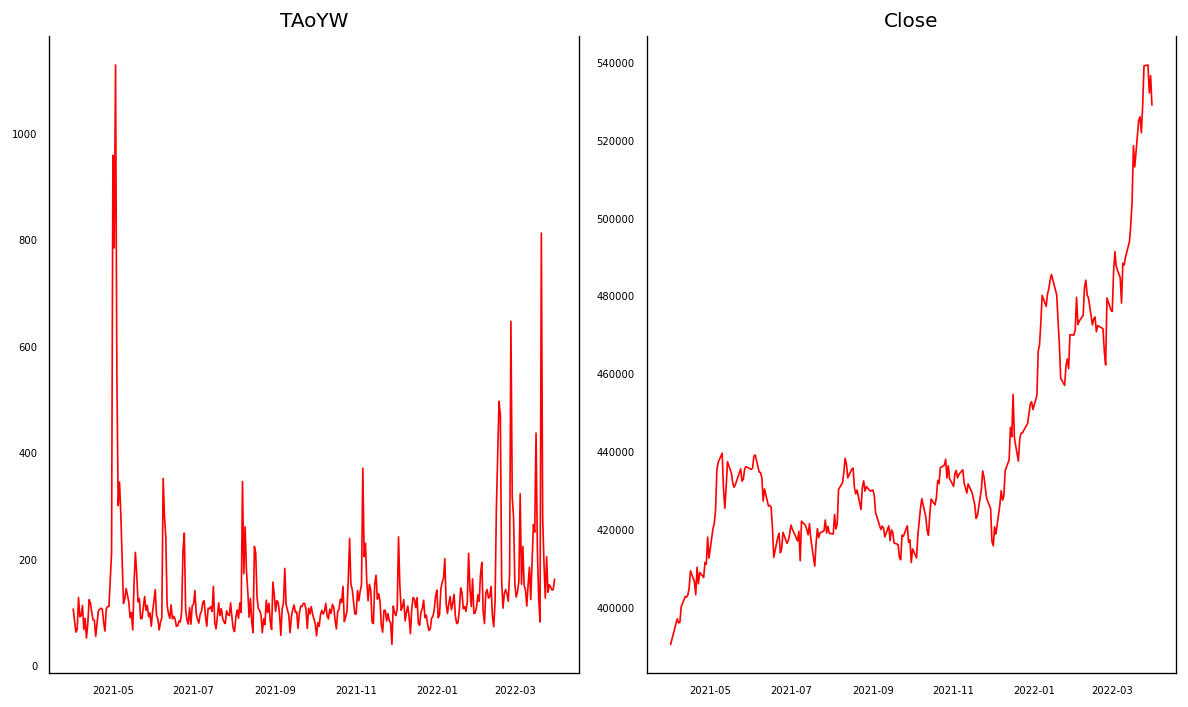

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = during_covid_two_v[during_covid_two_v.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(during_covid_two_v.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [29]:
ad_fuller_result_1 = adfuller(macro_data['TAoYW'])#.diff()[1:])

print('TAoYW')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_data['Close'])#.diff()[1:])

print('Close')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

TAoYW
ADF Statistic: -6.621195160360844
p-value: 6.0310956711192034e-09

---------------------

Close
ADF Statistic: 0.3014215355456125
p-value: 0.9774096116589592


In [31]:
ad_fuller_result_1 = adfuller(macro_data['TAoYW'])#.diff()[1:])

print('TAoYW')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_data['Close'].diff()[1:])

print('Close')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

TAoYW
ADF Statistic: -6.621195160360844
p-value: 6.0310956711192034e-09

---------------------

Close
ADF Statistic: -19.279517182676454
p-value: 0.0


In [37]:
print('TAoYW causes Close?\n')
print('------------------')
granger_1 = grangercausalitytests(macro_data[['Close','TAoYW']], 4)

print('\Close causes TAoYW ?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_data[[ 'TAoYW','Close']], 4)

TAoYW causes Close?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7972  , p=0.3725  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=0.8039  , p=0.3699  , df=1
likelihood ratio test: chi2=0.8030  , p=0.3702  , df=1
parameter F test:         F=0.7972  , p=0.3725  , df_denom=361, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8258  , p=0.4387  , df_denom=358, df_num=2
ssr based chi2 test:   chi2=1.6746  , p=0.4329  , df=2
likelihood ratio test: chi2=1.6707  , p=0.4337  , df=2
parameter F test:         F=0.8258  , p=0.4387  , df_denom=358, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.4808  , p=0.0161  , df_denom=355, df_num=3
ssr based chi2 test:   chi2=10.6482 , p=0.0138  , df=3
likelihood ratio test: chi2=10.4946 , p=0.0148  , df=3
parameter F test:         F=3.4808  , p=0.0161  , df_denom=355, df_num=3

Granger Causality
number of lags (no zero) 4
ssr base

In [38]:
macro_data = macro_data[['TAoYW','Close']]
print(macro_data.shape)

(365, 2)


In [39]:
train_df=macro_data[:-12]
test_df=macro_data[-12:]

In [40]:
print(test_df.shape)

(12, 2)


In [41]:
model = VAR(train_df.diff()[1:])

In [42]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        25.20      25.23*   8.830e+10       25.21
1        25.18       25.25   8.653e+10      25.21*
2        25.20       25.31   8.773e+10       25.24
3        25.17       25.33   8.521e+10       25.23
4        25.14       25.35   8.275e+10       25.22
5        25.14       25.39   8.242e+10       25.24
6        25.14       25.44   8.283e+10       25.26
7        25.14       25.49   8.304e+10       25.28
8        25.13       25.52   8.201e+10       25.29
9        25.13       25.57   8.242e+10       25.31
10      25.13*       25.61  8.166e+10*       25.32
11       25.14       25.67   8.328e+10       25.36
12       25.15       25.73   8.400e+10       25.38
13       25.14       25.76   8.294e+10       25.39
14       25.16       25.82   8.421e+10       25.42
15       25.17       25.88   8.529e+10       25.45
16       25.18       25.94   8.

In [45]:
var_model = VARMAX(train_df, order=(10,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                           Statespace Model Results                           
Dep. Variable:     ['TAoYW', 'Close']   No. Observations:                  353
Model:                        VAR(10)   Log Likelihood              -13099.281
                          + intercept   AIC                          26288.562
Date:                Mon, 18 Apr 2022   BIC                          26462.553
Time:                        12:30:07   HQIC                         26357.794
Sample:                    04-01-2021                                         
                         - 03-19-2022                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):         106.43, 334.37   Jarque-Bera (JB):      19425.96, 50.45
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.40, 2.33   Skew:                       4.91, 0.93
Prob(H) (two-sided):            0.00,

In [46]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)

predictions=predict.predicted_mean

In [51]:
predictions.columns=['TAoYW_predict','Close_predict']
predictions

,TAoYW_predict,Close_predict
2022-03-20,81.260565,452139.687243
2022-03-21,170.812501,433241.470565
2022-03-22,255.165302,410400.117114
2022-03-23,369.770261,397604.364615
2022-03-24,484.373974,397598.505734
2022-03-25,563.411186,407548.540295
2022-03-26,570.882873,420434.304309
2022-03-27,503.954619,430028.698020
2022-03-28,344.253483,433818.125853
2022-03-29,197.917222,433679.425789


In [52]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

<AxesSubplot:>

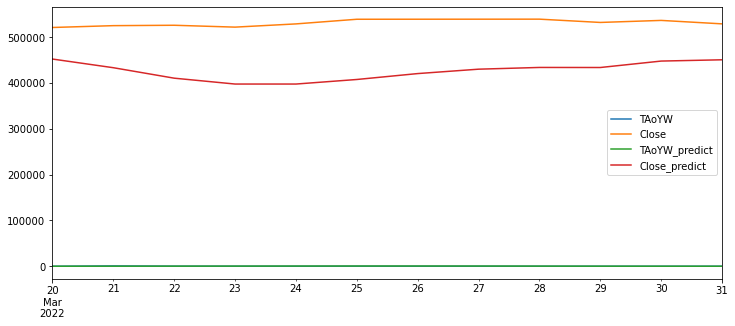

In [53]:
test_vs_pred.plot(figsize=(12,5))

In [55]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_ulc=math.sqrt(mean_squared_error(predictions['TAoYW_predict'],test_df['TAoYW']))
print('Mean value of TAoYW is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['TAoYW']),rmse_ulc))

rmse_rgnp=math.sqrt(mean_squared_error(predictions['Close_predict'],test_df['Close']))
print('Mean value of Close is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['Close']),rmse_rgnp))

Mean value of TAoYW is : 214.41666666666666. Root Mean Squared Error is :297.82830013830625
Mean value of ULC is : 531339.9166666666. Root Mean Squared Error is :106903.63480875628


In [57]:
macro_data = macro_data.asfreq(pd.infer_freq(macro_data.index))

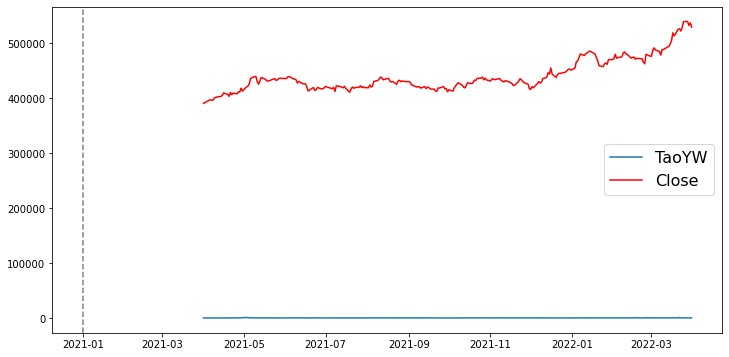

In [72]:
plt.figure(figsize=(12,6))
tweet = plt.plot(macro_data['TAoYW'])
close, = plt.plot(macro_data['Close'], color='red')

for year in range(2021, 2022):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

plt.legend(['TaoYW', 'Close'], fontsize=16)

In [69]:
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(macro_data)
#print(scaled)
normData = pd.DataFrame(scaler.transform(macro_data), index=macro_data.index, columns=macro_data.columns)
print(normData)

               TAoYW     Close
date                          
2021-04-01  0.060606  0.000000
2021-04-02  0.040404  0.008693
2021-04-03  0.021120  0.017387
2021-04-04  0.025712  0.026080
2021-04-05  0.080808  0.034774
...              ...       ...
2022-03-27  0.102847  0.999483
2022-03-28  0.099174  1.000000
2022-03-29  0.093664  0.951828
2022-03-30  0.094582  0.981588
2022-03-31  0.112029  0.931064

[365 rows x 2 columns]


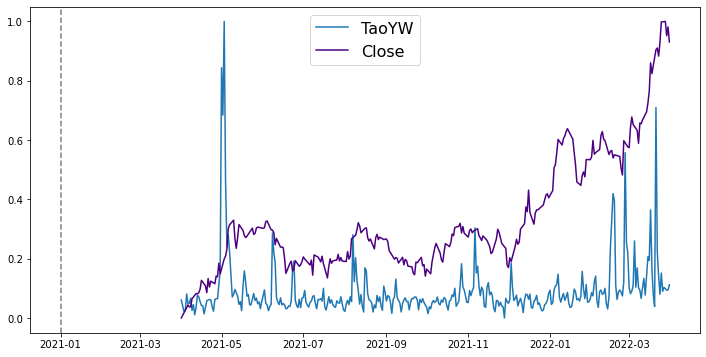

In [70]:
plt.figure(figsize=(12,6))
tweet = plt.plot(normData['TAoYW'])
close, = plt.plot(normData['Close'], color='indigo')

for year in range(2021, 2022):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

plt.legend(['TaoYW', 'Close'], fontsize=16)